In [5]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

In [10]:
img = cv2.imread("9.1 star.png (1).png")

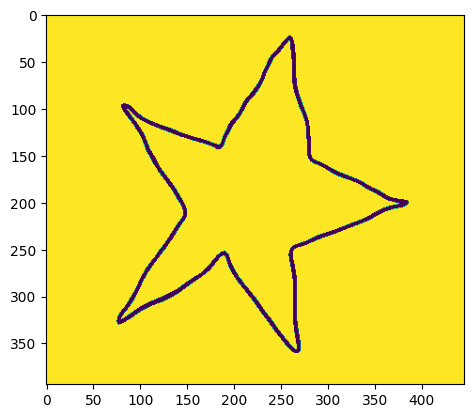

In [9]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
_ , thresh = cv2.threshold(gray,127,255,0)
plt.imshow(thresh)

In [ ]:
contours ,_ = cv2.findContours(thresh,2,1 )
hull = []
hull = cv2.convexHull(contours[0] , returnPoints=False) #dısbükey örtü kordinatları verilir

In [44]:
contours

(array([[[258,  28]],
 
        [[258,  29]],
 
        [[257,  30]],
 
        ...,
 
        [[259,  31]],
 
        [[259,  30]],
 
        [[259,  29]]], dtype=int32),
 array([[[0, 0]],
 
        [[0, 1]],
 
        [[0, 2]],
 
        ...,
 
        [[3, 0]],
 
        [[2, 0]],
 
        [[1, 0]]], dtype=int32),
 array([[[257,  23]],
 
        [[258,  22]],
 
        [[259,  22]],
 
        ...,
 
        [[254,  26]],
 
        [[255,  25]],
 
        [[256,  24]]], dtype=int32))

In [ ]:
contours[1] # contour listesindeki 2. kontur 

array([[[0, 0]],

       [[0, 1]],

       [[0, 2]],

       ...,

       [[3, 0]],

       [[2, 0]],

       [[1, 0]]], dtype=int32)

In [19]:
hull

array([[1101],
       [ 879],
       [ 656],
       [ 655],
       [ 438],
       [ 437],
       [ 215],
       [   0]], dtype=int32)

In [20]:
hull.shape

(8, 1)

In [31]:
hull[2][0]

656

In [ ]:
defects = cv2.convexityDefects(contours[0] , hull) #dıs kusurları bulur

In [23]:
defects.shape

(5, 1, 4)

In [24]:
defects.shape[0]

5

In [ ]:
defects

array([[[    0,   215,   116, 20035]],

       [[  215,   437,   329, 17166]],

       [[  438,   655,   550, 23214]],

       [[  656,   879,   763, 17223]],

       [[  879,  1101,   974, 13722]]], dtype=int32)

In [65]:
defects[2]

array([[  438,   655,   550, 23214]], dtype=int32)

In [ ]:
defects[1][0] #satır 4 değer tutar [baslangıc , son,uzaklık,d]

array([  215,   437,   329, 17166], dtype=int32)

In [18]:
defects.shape

(5, 1, 4)

In [67]:
defects[0].shape

(1, 4)

In [50]:
defects[1,0]

array([  215,   437,   329, 17166], dtype=int32)

In [51]:
a,b,c,d = defects[1,0]

In [52]:
a

215

In [53]:
b

437

In [62]:
contours[0]

array([[[258,  28]],

       [[258,  29]],

       [[257,  30]],

       ...,

       [[259,  31]],

       [[259,  30]],

       [[259,  29]]], dtype=int32)

In [56]:
tuple(contours[0][a][0])

(86, 101)

In [64]:
contours[0][a][0]

array([ 86, 101], dtype=int32)

In [68]:
start = tuple(contours[0][a][0])

In [69]:
start

(86, 101)

In [ ]:
for i in range(defects.shape[0]): #tespit edilen tüm kusurları içerir
    s,e,f,d = defects[i,0] # liste seklinde  bulunan kusurların liste içindeki 4  değeri cekilir
    
    # cekilen değerler contourdaki indexe yazılıp kordinat olarak değişkene atanır
    start = tuple(contours[0][s][0])
    end = tuple(contours[0][e][0])
    far = tuple(contours[0][f][0])

    cv2.line(img,start,end,[0,255,0] , 2)
    cv2.circle(img,far ,5,(0,255,0),-1)

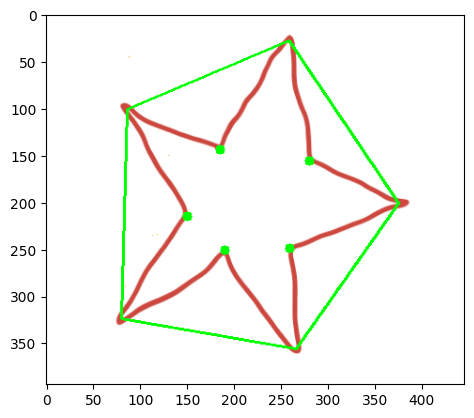

In [35]:
plt.imshow(img)